<h1>Projet 5 - Segmentez des clients d'un site de e-commerce<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preliminary" data-toc-modified-id="Preliminary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preliminary</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Graphics-and-Options" data-toc-modified-id="Graphics-and-Options-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Graphics and Options</a></span></li></ul></li><li><span><a href="#RFM-Analysis" data-toc-modified-id="RFM-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>RFM Analysis</a></span><ul class="toc-item"><li><span><a href="#Loading-data" data-toc-modified-id="Loading-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Loading data</a></span></li><li><span><a href="#Creating-RFM-segments" data-toc-modified-id="Creating-RFM-segments-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Creating RFM segments</a></span><ul class="toc-item"><li><span><a href="#RFM-Score" data-toc-modified-id="RFM-Score-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>RFM Score</a></span></li><li><span><a href="#Segmentation" data-toc-modified-id="Segmentation-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Segmentation</a></span></li></ul></li></ul></li><li><span><a href="#RFM-clustering-with-k-means" data-toc-modified-id="RFM-clustering-with-k-means-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>RFM clustering with k-means</a></span><ul class="toc-item"><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data preparation</a></span></li><li><span><a href="#K-means" data-toc-modified-id="K-means-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>K-means</a></span><ul class="toc-item"><li><span><a href="#Optimal-number-of-k" data-toc-modified-id="Optimal-number-of-k-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Optimal number of k</a></span></li><li><span><a href="#Clusters-evaluation" data-toc-modified-id="Clusters-evaluation-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Clusters evaluation</a></span></li><li><span><a href="#Clusters-analysis-and-visualization" data-toc-modified-id="Clusters-analysis-and-visualization-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Clusters analysis and visualization</a></span></li></ul></li></ul></li></ul></div>

<div class ="alert alert-block alert-info">
    <b>Notebook : RFM clustering</b>
</div>

# Preliminary

## Imports

We import the necessary libraries:

In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib as mpl 
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import squarify
from math import pi

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import DBSCAN
from sklearn.model_selection import ParameterGrid
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy import stats
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from scipy.spatial.distance import euclidean
from itertools import combinations
from sklearn.pipeline import Pipeline

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Graphics and Options

We define Seaborn's style:

In [2]:
sns.set(style="whitegrid")

# RFM Analysis

## Loading data

We load the data:

In [3]:
data = './data/cleaned/'
os.listdir(data)

['rfm_df.csv', 'rfm_df_2.csv']

In [4]:
fn = data + 'rfm_df.csv'
data = pd.read_csv(fn)

In [5]:
data

customer_unique_id  recency  frequency  monetary
0      0000366f3b9a7992bf8c76cfdf3221e2      113          1    141.90
1      0000b849f77a49e4a4ce2b2a4ca5be3f      116          1     27.19
2      0000f46a3911fa3c0805444483337064      538          1     86.22
3      0000f6ccb0745a6a4b88665a16c9f078      322          1     43.62
4      0004aac84e0df4da2b147fca70cf8255      289          1    196.89
...                                 ...      ...        ...       ...
90222  fffb09418989a0dbff854a28163e47c6      256          1     73.16
90223  fffea47cd6d3cc0a88bd621562a9d061      263          1     84.58
90224  ffff371b4d645b6ecea244b27531430a      569          1    112.46
90225  ffff5962728ec6157033ef9805bacc48      120          1    133.69
90226  ffffd2657e2aad2907e67c3e9daecbeb      485          1     71.56

[90227 rows x 4 columns]

In [6]:
data.set_index("customer_unique_id", inplace=True)

In [7]:
data

recency  frequency  monetary
customer_unique_id                                            
0000366f3b9a7992bf8c76cfdf3221e2      113          1    141.90
0000b849f77a49e4a4ce2b2a4ca5be3f      116          1     27.19
0000f46a3911fa3c0805444483337064      538          1     86.22
0000f6ccb0745a6a4b88665a16c9f078      322          1     43.62
0004aac84e0df4da2b147fca70cf8255      289          1    196.89
...                                   ...        ...       ...
fffb09418989a0dbff854a28163e47c6      256          1     73.16
fffea47cd6d3cc0a88bd621562a9d061      263          1     84.58
ffff371b4d645b6ecea244b27531430a      569          1    112.46
ffff5962728ec6157033ef9805bacc48      120          1    133.69
ffffd2657e2aad2907e67c3e9daecbeb      485          1     71.56

[90227 rows x 3 columns]

---

## Creating RFM segments

### RFM Score

Let's calculate the RFM scores to do the RFM segmentation:

In [8]:
data["recency_score"]  = pd.qcut(data['recency'], 5, labels=[5, 4, 3, 2, 1])
data["frequency_score"]= pd.qcut(data['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
data["monetary_score"] = pd.qcut(data['monetary'], 5, labels=[1, 2, 3, 4, 5])

We create an overall RFM score:

In [9]:
data['rfm_score'] = data.recency_score.astype(str)+ data.frequency_score.astype(str) + data.monetary_score.astype(str)
data

recency  frequency  monetary recency_score  \
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2      113          1    141.90             4   
0000b849f77a49e4a4ce2b2a4ca5be3f      116          1     27.19             4   
0000f46a3911fa3c0805444483337064      538          1     86.22             1   
0000f6ccb0745a6a4b88665a16c9f078      322          1     43.62             2   
0004aac84e0df4da2b147fca70cf8255      289          1    196.89             2   
...                                   ...        ...       ...           ...   
fffb09418989a0dbff854a28163e47c6      256          1     73.16             3   
fffea47cd6d3cc0a88bd621562a9d061      263          1     84.58             3   
ffff371b4d645b6ecea244b27531430a      569          1    112.46             1   
ffff5962728ec6157033ef9805bacc48      120          1    133.69             4   
ffffd2657e2aad2907e67c3e9daecbeb      485          1     71.56             1   

                                 frequency_score monetary_score rfm_score  
customer_unique_id                                                         
0000366f3b9a7992bf8c76cfdf3221e2               1              4       414  
0000b849f77a49e4a4ce2b2a4ca5be3f               1              1       411  
0000f46a3911fa3c0805444483337064               1              2       112  
0000f6ccb0745a6a4b88665a16c9f078               1              1       211  
0004aac84e0df4da2b147fca70cf8255               1              4       214  
...                                          ...            ...       ...  
fffb09418989a0dbff854a28163e47c6               5              2       352  
fffea47cd6d3cc0a88bd621562a9d061               5              2       352  
ffff371b4d645b6ecea244b27531430a               5              3       153  
ffff5962728ec6157033ef9805bacc48               5              3       453  
ffffd2657e2aad2907e67c3e9daecbeb               5              2       152  

[90227 rows x 7 columns]

### Segmentation

We will segment customers this way:

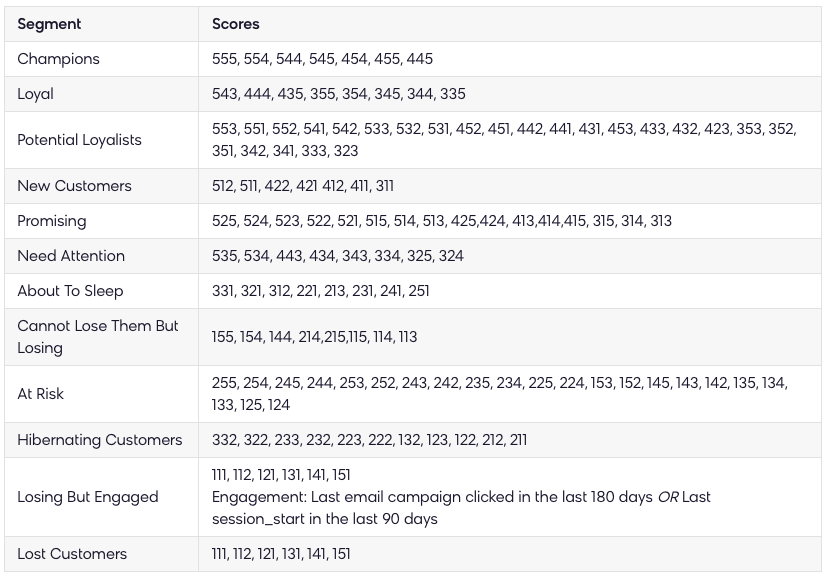
Source : https://documentation.bloomreach.com/engagement/docs/rfm-segmentation

In [10]:
seg_map= {
    r'111|112|121|131|141|151': 'Lost customers',
    r'332|322|233|232|223|222|132|123|122|212|211': 'Hibernating customers', 
    r'155|154|144|214|215|115|114|113': 'Cannot Lose Them',
    r'255|254|245|244|253|252|243|242|235|234|225|224|153|152|145|143|142|135|134|133|125|124': 'At Risk',
    r'331|321|312|221|213|231|241|251': 'About To Sleep',
    r'535|534|443|434|343|334|325|324': 'Need Attention',
    r'525|524|523|522|521|515|514|513|425|424|413|414|415|315|314|313': 'Promising',
    r'512|511|422|421|412|411|311': 'New Customers',
    r'553|551|552|541|542|533|532|531|452|451|442|441|431|453|433|432|423|353|352|351|342|341|333|323': 'Potential Loyalist',
    r'543|444|435|355|354|345|344|335': 'Loyal',
    r'555|554|544|545|454|455|445': 'Champions'
}

In [11]:
data['segment'] = data['recency_score'].astype(str) + data['frequency_score'].astype(str) + data['monetary_score'].astype(str)
data['segment'] = data['segment'].replace(seg_map, regex=True)
data.head()

recency  frequency  monetary recency_score  \
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2      113          1    141.90             4   
0000b849f77a49e4a4ce2b2a4ca5be3f      116          1     27.19             4   
0000f46a3911fa3c0805444483337064      538          1     86.22             1   
0000f6ccb0745a6a4b88665a16c9f078      322          1     43.62             2   
0004aac84e0df4da2b147fca70cf8255      289          1    196.89             2   

                                 frequency_score monetary_score rfm_score  \
customer_unique_id                                                          
0000366f3b9a7992bf8c76cfdf3221e2               1              4       414   
0000b849f77a49e4a4ce2b2a4ca5be3f               1              1       411   
0000f46a3911fa3c0805444483337064               1              2       112   
0000f6ccb0745a6a4b88665a16c9f078               1              1       211   
0004aac84e0df4da2b147fca70cf8255               1              4       214   

                                                segment  
customer_unique_id                                       
0000366f3b9a7992bf8c76cfdf3221e2              Promising  
0000b849f77a49e4a4ce2b2a4ca5be3f          New Customers  
0000f46a3911fa3c0805444483337064         Lost customers  
0000f6ccb0745a6a4b88665a16c9f078  Hibernating customers  
0004aac84e0df4da2b147fca70cf8255       Cannot Lose Them

In [12]:
data['segment'].unique()

array(['Promising', 'New Customers', 'Lost customers',
       'Hibernating customers', 'Cannot Lose Them', 'About To Sleep',
       'Loyal', 'Champions', 'At Risk', 'Potential Loyalist',
       'Need Attention'], dtype=object)

In [13]:
data['segment'].nunique()

11

In [14]:
rfm_stats = data[["segment", 
                  "recency", 
                  "frequency", 
                  "monetary"]].groupby("segment").agg(['mean',
                                                       'median', 'min', 'max', 'count'])
rfm_stats

recency                         frequency         \
                             mean median  min  max  count      mean median   
segment                                                                      
About To Sleep         277.293314  279.0  178  382   5639  1.000355    1.0   
At Risk                386.482688  367.0  270  696  15567  1.040856    1.0   
Cannot Lose Them       436.686110  438.0  270  696   5709  1.059905    1.0   
Champions               85.019412   81.0    2  177   5512  1.188861    1.0   
Hibernating customers  342.825698  326.0  178  695   8164  1.000000    1.0   
Lost customers         475.266874  469.0  383  696   4504  1.001998    1.0   
Loyal                  178.377429  192.5    2  269   5866  1.089499    1.0   
Need Attention         156.340284  178.0    2  269   5563  1.000000    1.0   
New Customers          124.179025  127.0    2  269   5044  1.000000    1.0   
Potential Loyalist     131.116388  130.0    2  269  17055  1.017825    1.0   
Promising              106.206567   92.0    2  269  11604  1.000000    1.0   

                                        monetary                            \
                      min max  count        mean   median     min      max   
segment                                                                      
About To Sleep          1   2   5639   52.554302   44.640   10.07   138.05   
At Risk                 1   6  15567  242.491472  160.760   55.62  1609.04   
Cannot Lose Them        1   4   5709  284.835749  198.950   89.07  1590.25   
Champions               1  14   5512  360.498442  256.835  138.14  1608.36   
Hibernating customers   1   1   8164   79.481814   75.080   11.63   138.08   
Lost customers          1   3   4504   45.106281   43.195   12.28    88.74   
Loyal                   1   7   5866  320.711771  232.965   88.83  1602.25   
Need Attention          1   1   5563  232.498476  171.550   88.82  1599.88   
New Customers           1   1   5044   52.748317   51.035    9.59    88.72   
Potential Loyalist      1   3  17055   74.649690   70.480   10.89   138.08   
Promising               1   1  11604  232.270868  162.840   14.06  1610.50   

                              
                       count  
segment                       
About To Sleep          5639  
At Risk                15567  
Cannot Lose Them        5709  
Champions               5512  
Hibernating customers   8164  
Lost customers          4504  
Loyal                   5866  
Need Attention          5563  
New Customers           5044  
Potential Loyalist     17055  
Promising              11604

In [15]:
rfm_stats['ratio']= (100*rfm_stats['monetary']["count"]/rfm_stats['monetary']["count"].sum()).round(2)
rfm_stats

recency                         frequency         \
                             mean median  min  max  count      mean median   
segment                                                                      
About To Sleep         277.293314  279.0  178  382   5639  1.000355    1.0   
At Risk                386.482688  367.0  270  696  15567  1.040856    1.0   
Cannot Lose Them       436.686110  438.0  270  696   5709  1.059905    1.0   
Champions               85.019412   81.0    2  177   5512  1.188861    1.0   
Hibernating customers  342.825698  326.0  178  695   8164  1.000000    1.0   
Lost customers         475.266874  469.0  383  696   4504  1.001998    1.0   
Loyal                  178.377429  192.5    2  269   5866  1.089499    1.0   
Need Attention         156.340284  178.0    2  269   5563  1.000000    1.0   
New Customers          124.179025  127.0    2  269   5044  1.000000    1.0   
Potential Loyalist     131.116388  130.0    2  269  17055  1.017825    1.0   
Promising              106.206567   92.0    2  269  11604  1.000000    1.0   

                                        monetary                            \
                      min max  count        mean   median     min      max   
segment                                                                      
About To Sleep          1   2   5639   52.554302   44.640   10.07   138.05   
At Risk                 1   6  15567  242.491472  160.760   55.62  1609.04   
Cannot Lose Them        1   4   5709  284.835749  198.950   89.07  1590.25   
Champions               1  14   5512  360.498442  256.835  138.14  1608.36   
Hibernating customers   1   1   8164   79.481814   75.080   11.63   138.08   
Lost customers          1   3   4504   45.106281   43.195   12.28    88.74   
Loyal                   1   7   5866  320.711771  232.965   88.83  1602.25   
Need Attention          1   1   5563  232.498476  171.550   88.82  1599.88   
New Customers           1   1   5044   52.748317   51.035    9.59    88.72   
Potential Loyalist      1   3  17055   74.649690   70.480   10.89   138.08   
Promising               1   1  11604  232.270868  162.840   14.06  1610.50   

                              ratio  
                       count         
segment                              
About To Sleep          5639   6.25  
At Risk                15567  17.25  
Cannot Lose Them        5709   6.33  
Champions               5512   6.11  
Hibernating customers   8164   9.05  
Lost customers          4504   4.99  
Loyal                   5866   6.50  
Need Attention          5563   6.17  
New Customers           5044   5.59  
Potential Loyalist     17055  18.90  
Promising              11604  12.86

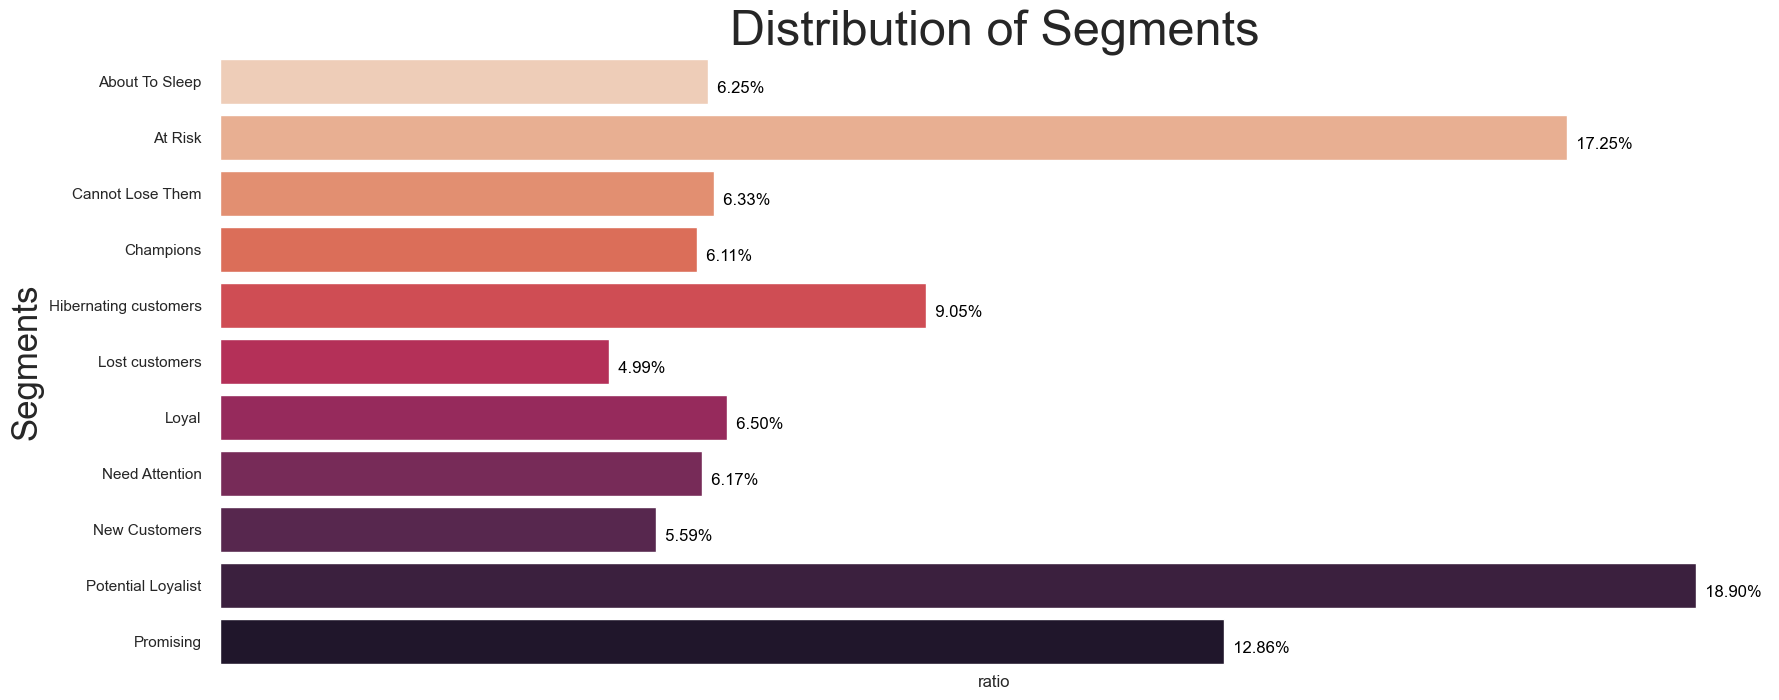

In [16]:
plt.figure(figsize=(20,8))

per= sns.barplot(x=rfm_stats['ratio'], y=rfm_stats.index, data=rfm_stats, palette="rocket_r")
sns.despine(bottom = True, left = True)
for i, v in enumerate(rfm_stats['ratio']):
    per.text(v, i+.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
per.set_ylabel('Segments', fontsize=25)
per.set(xticks=[])
plt.title('Distribution of Segments', fontsize=35)
plt.show()

Text(0.5, 0.98, 'RFM Segmentation')

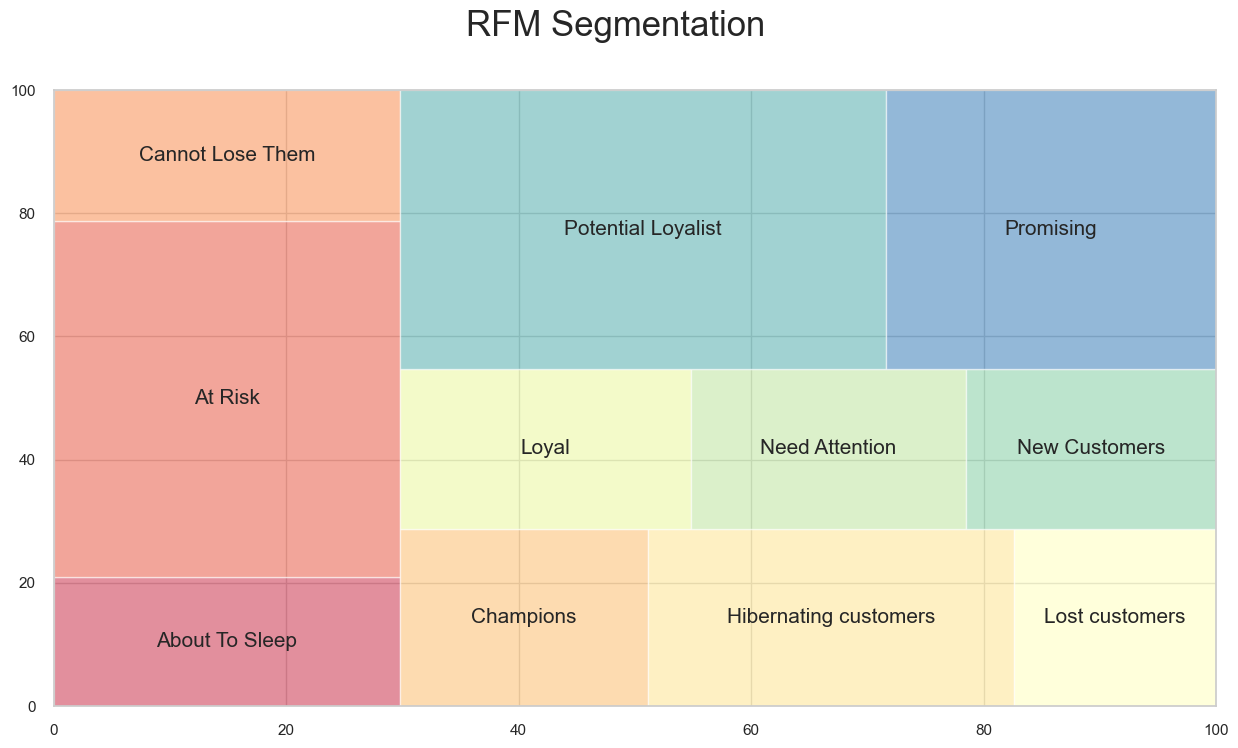

In [17]:
colors = sns.color_palette("Spectral", n_colors=11)

plt.figure(figsize=(15,8))
plt.rc('font', size=15)
squarify.plot(sizes=rfm_stats["recency"]["count"], label=rfm_stats.index, 
              color = colors, alpha=.55)
plt.suptitle("RFM Segmentation", fontsize=25)

---

# RFM clustering with k-means

## Data preparation

In [18]:
rfm_df = data.drop(["recency_score", "frequency_score", "monetary_score", "rfm_score", "segment"], axis=1)
rfm_df

recency  frequency  monetary
customer_unique_id                                            
0000366f3b9a7992bf8c76cfdf3221e2      113          1    141.90
0000b849f77a49e4a4ce2b2a4ca5be3f      116          1     27.19
0000f46a3911fa3c0805444483337064      538          1     86.22
0000f6ccb0745a6a4b88665a16c9f078      322          1     43.62
0004aac84e0df4da2b147fca70cf8255      289          1    196.89
...                                   ...        ...       ...
fffb09418989a0dbff854a28163e47c6      256          1     73.16
fffea47cd6d3cc0a88bd621562a9d061      263          1     84.58
ffff371b4d645b6ecea244b27531430a      569          1    112.46
ffff5962728ec6157033ef9805bacc48      120          1    133.69
ffffd2657e2aad2907e67c3e9daecbeb      485          1     71.56

[90227 rows x 3 columns]

In [19]:
# Checking data skewness

def check_skew(df, column):
    skew = stats.skew(df[column])
    skewtest = stats.skewtest(df[column])
    
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title('Distribution of ' + column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    
    print("Skewness de {}: {}, Skewtest: {}".format(column, skew, skewtest))
    return

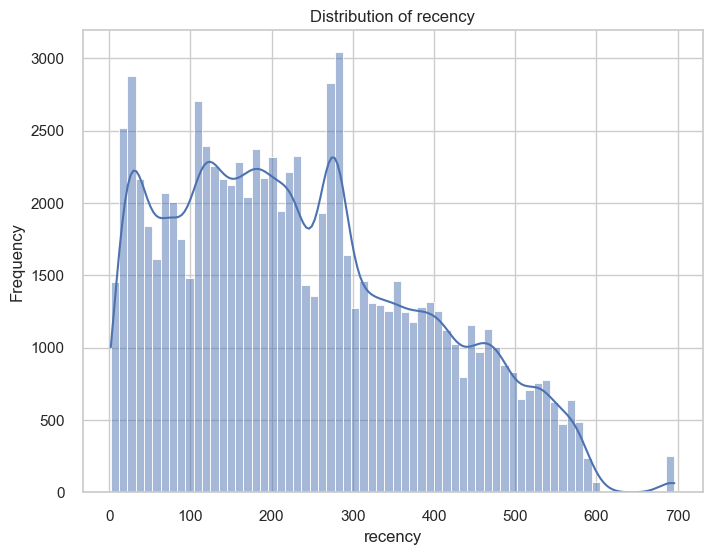

Skewness de recency: 0.45085310929565675, Skewtest: SkewtestResult(statistic=52.81038049057347, pvalue=0.0)


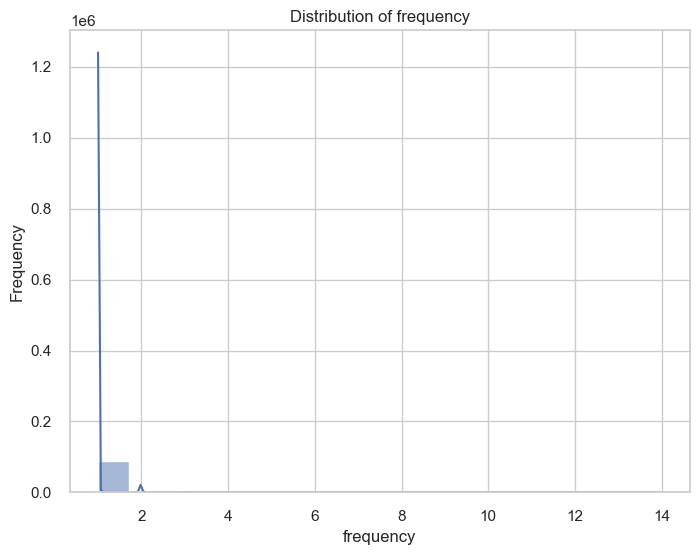

Skewness de frequency: 10.365503236809158, Skewtest: SkewtestResult(statistic=324.05377036113543, pvalue=0.0)


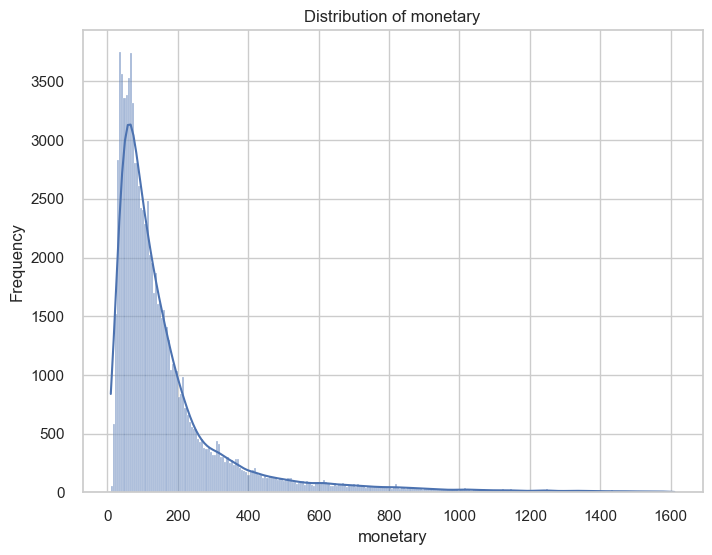

Skewness de monetary: 3.154931822976426, Skewtest: SkewtestResult(statistic=206.40911475652229, pvalue=0.0)


In [20]:
for col in rfm_df.columns:
    check_skew(rfm_df, col)

- If the skewness is between -0.5 and 0.5, the data is fairly symmetrical.
- If the skewness is between -1 and - 0.5 or between 0.5 and 1, the data is moderately skewed.
- If the skewness is less than -1 or greater than 1, the data is highly skewed.

We apply log transform for the Frequency and Monetary columns:

In [21]:
rfm_log = rfm_df.copy()
rfm_log

recency  frequency  monetary
customer_unique_id                                            
0000366f3b9a7992bf8c76cfdf3221e2      113          1    141.90
0000b849f77a49e4a4ce2b2a4ca5be3f      116          1     27.19
0000f46a3911fa3c0805444483337064      538          1     86.22
0000f6ccb0745a6a4b88665a16c9f078      322          1     43.62
0004aac84e0df4da2b147fca70cf8255      289          1    196.89
...                                   ...        ...       ...
fffb09418989a0dbff854a28163e47c6      256          1     73.16
fffea47cd6d3cc0a88bd621562a9d061      263          1     84.58
ffff371b4d645b6ecea244b27531430a      569          1    112.46
ffff5962728ec6157033ef9805bacc48      120          1    133.69
ffffd2657e2aad2907e67c3e9daecbeb      485          1     71.56

[90227 rows x 3 columns]

In [22]:
for i in rfm_log.columns[1:]:
    rfm_log[i] = np.log10(rfm_log[i])

In [23]:
rfm_log

recency  frequency  monetary
customer_unique_id                                            
0000366f3b9a7992bf8c76cfdf3221e2      113        0.0  2.151982
0000b849f77a49e4a4ce2b2a4ca5be3f      116        0.0  1.434409
0000f46a3911fa3c0805444483337064      538        0.0  1.935608
0000f6ccb0745a6a4b88665a16c9f078      322        0.0  1.639686
0004aac84e0df4da2b147fca70cf8255      289        0.0  2.294224
...                                   ...        ...       ...
fffb09418989a0dbff854a28163e47c6      256        0.0  1.864274
fffea47cd6d3cc0a88bd621562a9d061      263        0.0  1.927268
ffff371b4d645b6ecea244b27531430a      569        0.0  2.050998
ffff5962728ec6157033ef9805bacc48      120        0.0  2.126099
ffffd2657e2aad2907e67c3e9daecbeb      485        0.0  1.854670

[90227 rows x 3 columns]

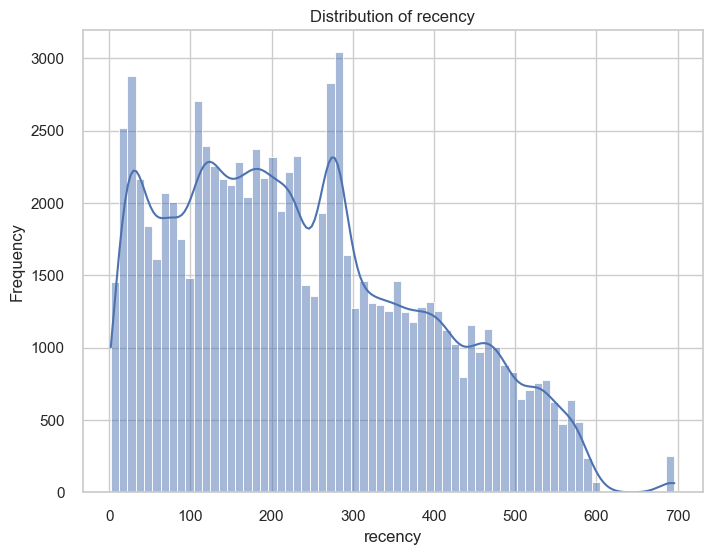

Skewness de recency: 0.45085310929565675, Skewtest: SkewtestResult(statistic=52.81038049057347, pvalue=0.0)


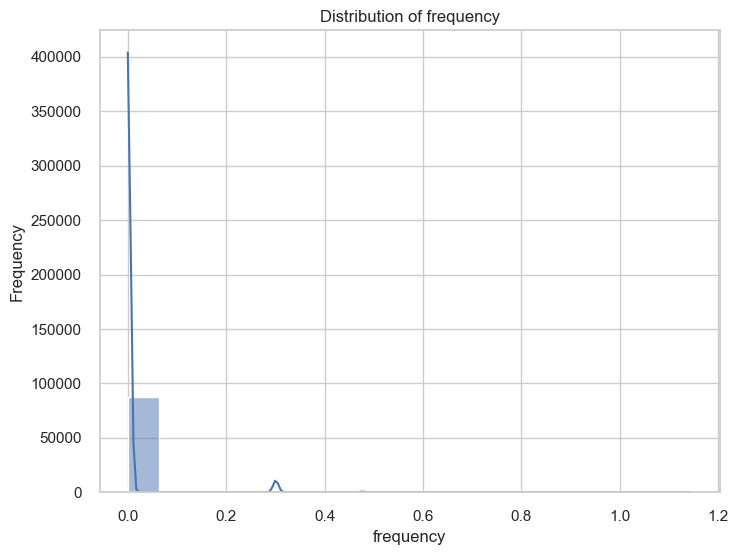

Skewness de frequency: 6.142208877188802, Skewtest: SkewtestResult(statistic=271.9316451404878, pvalue=0.0)


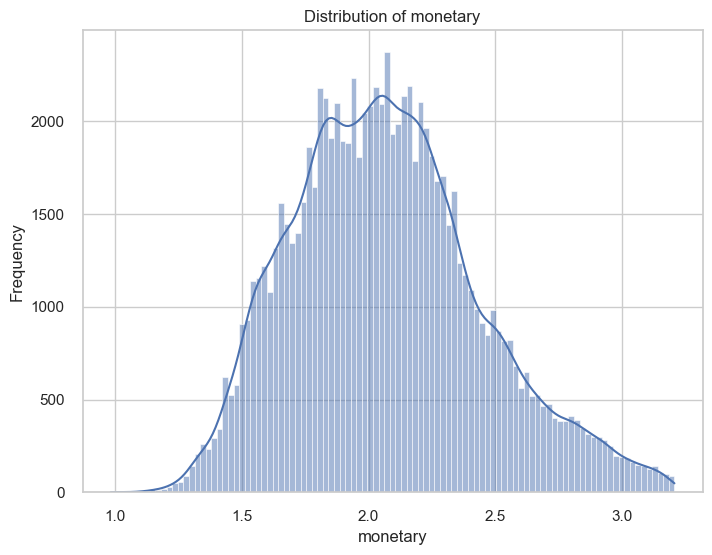

Skewness de monetary: 0.43350121388188156, Skewtest: SkewtestResult(statistic=50.93909754025984, pvalue=0.0)


In [24]:
for col in rfm_log.columns:
    check_skew(rfm_log, col)

We standardize the data:

In [25]:
scaler = StandardScaler()
rfm_log_scaled = scaler.fit_transform(rfm_log)
rfm_log_scaled_df = pd.DataFrame(rfm_log_scaled)
rfm_log_scaled_df.columns = ['recency', 'frequency', 'monetary']
rfm_log_scaled_df.head()

recency  frequency  monetary
0 -0.820432  -0.169144  0.218977
1 -0.800773  -0.169144 -1.706038
2  1.964553  -0.169144 -0.361485
3  0.549125  -0.169144 -1.155348
4  0.332879  -0.169144  0.600564

In [26]:
rfm_log_scaled_df.describe().T

count          mean       std       min       25%       50%  \
recency    90227.0  6.999941e-17  1.000006 -1.547804 -0.807326 -0.125824   
frequency  90227.0  1.217090e-16  1.000006 -0.169144 -0.169144 -0.169144   
monetary   90227.0 -1.513192e-15  1.000006 -2.920192 -0.720959 -0.060666   

                75%        max  
recency    0.712948   2.999911  
frequency -0.169144  21.069593  
monetary   0.604758   3.049141


---

## K-means

- K-means is an unsupervised clustering algorithm that partitions data into K distinct clusters.
- The goal is to minimize the distance between data points in the same cluster and maximize the distance between clusters.
- It starts by randomly initializing K centroids. Data points are assigned to the nearest centroid, forming clusters. Centroids are recalculated as the mean of all points in the cluster.The assignment and update of centroids is iterated until clusters are stable or changes are below a threshold.
- K-means is favored for its simplicity and efficiency.
- Limitations include the need to predefine the number of clusters (K) and sensitivity to the initial centroid positions.

### Optimal number of k

We determine the optimal number of clusters for k-means with elbow method:

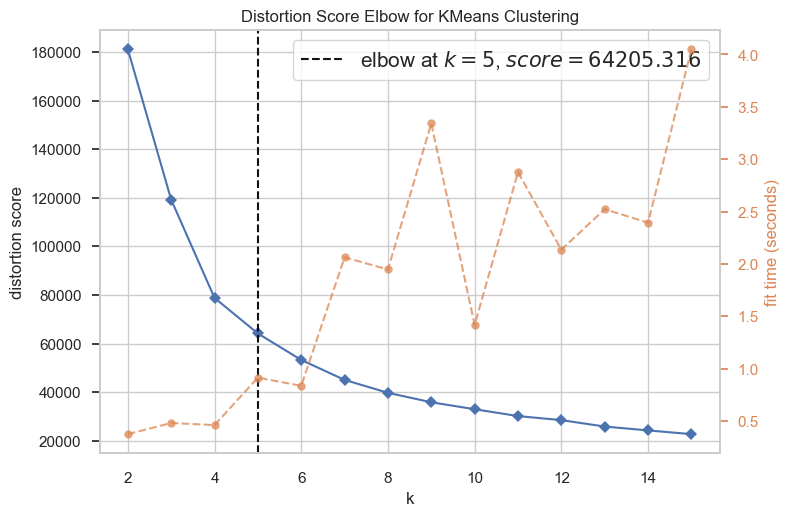

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
# We instantiate the model and visualize it
model = KMeans()
elbow = KElbowVisualizer(model, k=(2,16))

elbow.fit(rfm_log_scaled_df)  # Fit the data to the visualizer
elbow.poof()  # Generate and display graphical visualization of data

The optimal value of k is 5. To check if this clustering works, we will use SilhouetteVisualizer to display the silhouette coefficient for a sampling of each cluster. This allows the density and separation of clusters to be visualized.

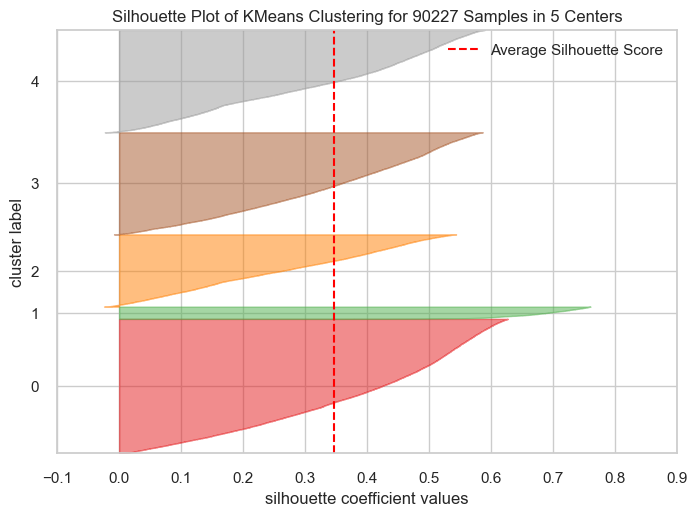

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 90227 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [28]:
# We instantiate the model and visualize it
model = KMeans(5)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(rfm_log_scaled_df)    # Fit the data to the visualizer
visualizer.poof()   # Generate and display graphical visualization of data

The silhouette coefficient assesses how similar each point in a cluster is to the points in its own cluster compared to points in other clusters, with values ranging from -1 to 1. Here's the detailed analysis:

- **Silhouette Coefficients**: Values range from nearly -0.1 to 0.9. Positive coefficients suggest well-clustered samples, with higher values indicating a better fit within the cluster.
- **Cluster Sizes**: The silhouette widths show that sample distribution across clusters is uneven. Some clusters have more samples than others.
- **Average Silhouette Score**: The dashed red line indicates the average silhouette score for all samples. The closer this score is to 1, the better the separation between clusters.
- **Cluster Interpretation**: All clusters have silhouette coefficients above the average, indicating good separation. However, there's significant variation in cohesion within clusters; for instance, some cluster have a wider range of coefficients, suggesting heterogeneity within that cluster.

Now, we will test other types of metrics to find the best K:

- Silouhette: average ratio between the intra-cluster distance and the distance of the nearest cluster,
- Calinski Harabasz: relationship between cluster dispersion within and between groups.

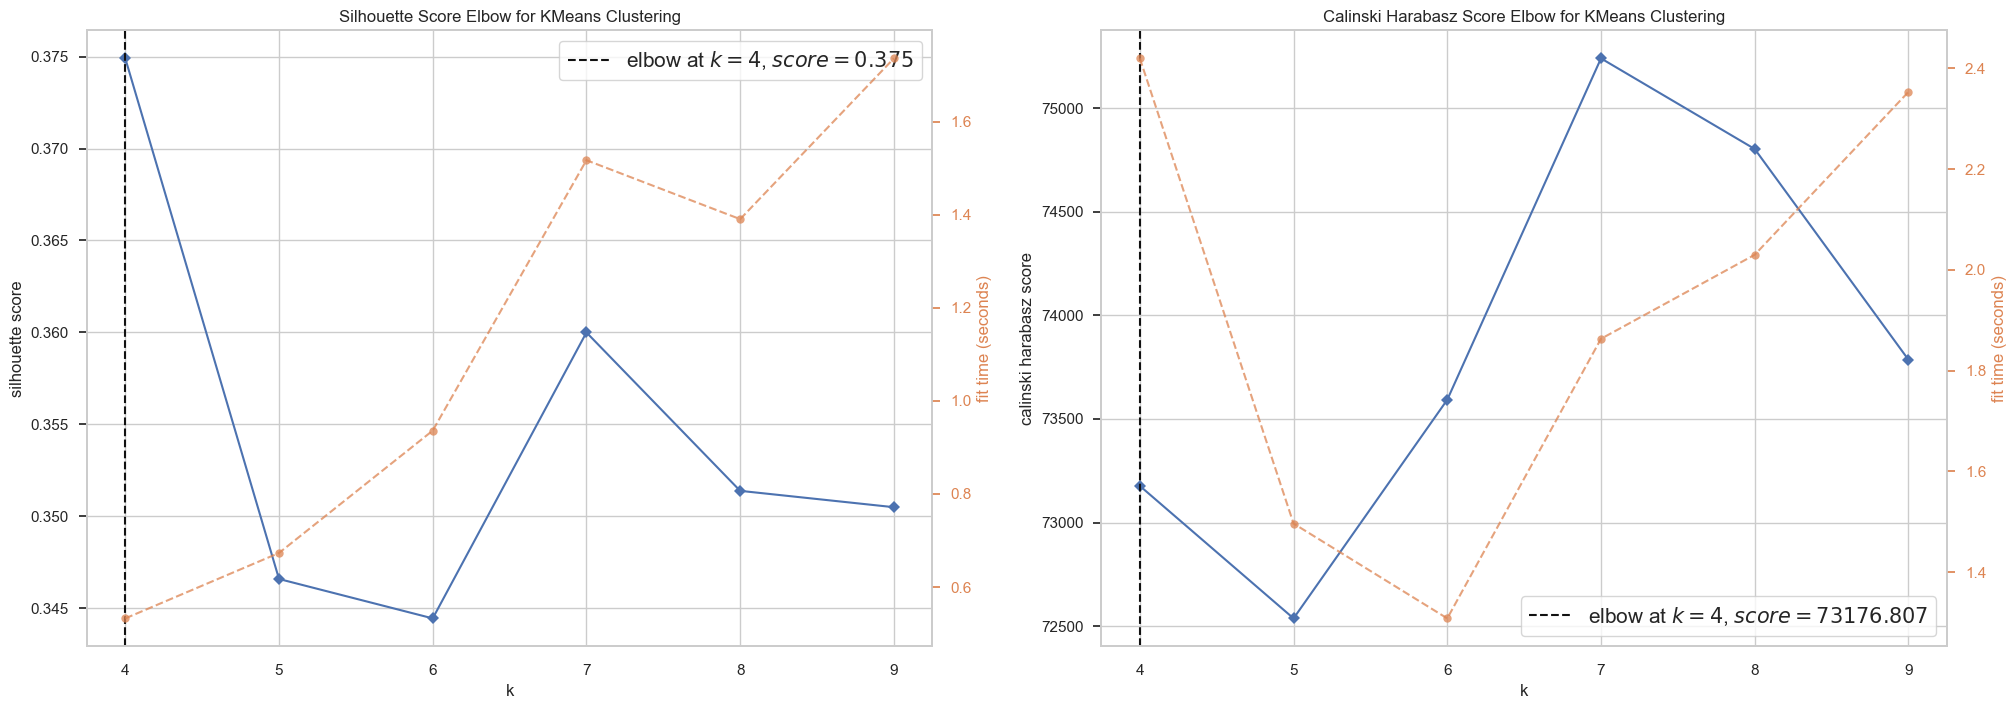

In [29]:
X = rfm_log_scaled_df.copy()

# Elbow method with differents metrics
metrics = ["silhouette", "calinski_harabasz"]
i = 0

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(24, 8))

for m in metrics:
    kmeans_visualizer = KElbowVisualizer(KMeans(),
                                        k=(4, 10),
                                        metric=m,
                                        ax=axes[i])
    kmeans_visualizer.fit(X)
    kmeans_visualizer.finalize()
    i += 1

plt.show()

The best k is finally 4 according with Silhouette score et Calinski Harabasz score.

In [30]:
best_k = 4

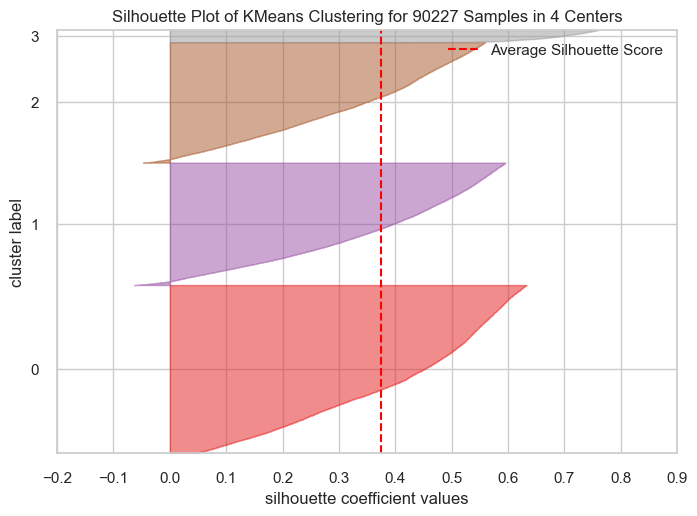

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 90227 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [31]:
# We instantiate the model and visualize it
model = KMeans(best_k)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(rfm_log_scaled_df)    # Fit the data to the visualizer
visualizer.poof()   # Generate and display graphical visualization of data

In [32]:
kmeans_best = KMeans(n_clusters=best_k)
kmeans_best.fit(rfm_log_scaled_df)

KMeans(n_clusters=4)

### Clusters evaluation

Let's evaluate our clusters:
- **Silhouette Score**: It measures how well data points within clusters are similar to each other and different from neighboring clusters, with a higher score indicating better clustering quality.
- **Calinski-Harabasz Score**: It quantifies the separation and cohesion of clusters by maximizing inter-cluster variance while minimizing intra-cluster variance, with a higher score indicating improved cluster separation.
- **Davies-Bouldin Index**: It measures the average similarity between each cluster and its nearest neighbor cluster. A lower score indicates better cluster separation.

In [33]:
# Use fit_predict to cluster the dataset
predictions = kmeans_best.fit_predict(rfm_log_scaled_df)

# Calculate cluster validation metrics
score_kmeans_s = silhouette_score(rfm_log_scaled_df, kmeans_best.labels_, metric='euclidean')
score_kmeans_c = calinski_harabasz_score(rfm_log_scaled_df, kmeans_best.labels_)
score_kmeans_d = davies_bouldin_score(rfm_log_scaled_df, predictions)
print('Silhouette Score: %.4f' % score_kmeans_s)
print('Calinski Harabasz Score: %.4f' % score_kmeans_c)
print('Davies Bouldin Score: %.4f' % score_kmeans_d)

Silhouette Score: 0.3749
Calinski Harabasz Score: 73178.0709
Davies Bouldin Score: 0.7673


### Clusters analysis and visualization

In [34]:
rfm_log_scaled_df['cluster']= kmeans_best.labels_
rfm_log_scaled_df.head()

recency  frequency  monetary  cluster
0 -0.820432  -0.169144  0.218977        3
1 -0.800773  -0.169144 -1.706038        3
2  1.964553  -0.169144 -0.361485        0
3  0.549125  -0.169144 -1.155348        0
4  0.332879  -0.169144  0.600564        1

In [35]:
# Function to visualize clusters
def rfm_clusters_stat(df):
    df_new = df.groupby(['cluster']).agg({
            'recency'  : ['mean','median', 'min', 'max'],
            'frequency': ['mean','median', 'min', 'max'],
            'monetary' : ['mean','median', 'min', 'max', 'count']
        }).round(0)

    return df_new

In [51]:
rfm_df2 = rfm_df.copy()
rfm_df2['cluster'] = kmeans_best.labels_
rfm_df2

recency  frequency  monetary  cluster
customer_unique_id                                                     
0000366f3b9a7992bf8c76cfdf3221e2      113          1    141.90        3
0000b849f77a49e4a4ce2b2a4ca5be3f      116          1     27.19        3
0000f46a3911fa3c0805444483337064      538          1     86.22        0
0000f6ccb0745a6a4b88665a16c9f078      322          1     43.62        0
0004aac84e0df4da2b147fca70cf8255      289          1    196.89        1
...                                   ...        ...       ...      ...
fffb09418989a0dbff854a28163e47c6      256          1     73.16        3
fffea47cd6d3cc0a88bd621562a9d061      263          1     84.58        3
ffff371b4d645b6ecea244b27531430a      569          1    112.46        0
ffff5962728ec6157033ef9805bacc48      120          1    133.69        3
ffffd2657e2aad2907e67c3e9daecbeb      485          1     71.56        0

[90227 rows x 4 columns]

In [52]:
rfm_clusters_stat(rfm_df2).style.background_gradient(cmap='rocket_r')

In [53]:
rfm_stats2 = pd.DataFrame(rfm_clusters_stat(rfm_df2))
rfm_stats2

recency                  frequency                monetary         \
           mean median  min  max      mean median min max     mean median   
cluster                                                                     
0         425.0  417.0  265  696       1.0    1.0   1   1    126.0  101.0   
1         179.0  174.0    2  588       1.0    1.0   1   1    355.0  248.0   
2         221.0  200.0    2  693       2.0    2.0   2  14    355.0  255.0   
3         146.0  145.0    2  362       1.0    1.0   1   1     73.0   68.0   

                               
           min     max  count  
cluster                        
0         12.0  1533.0  26063  
1        129.0  1610.0  25646  
2         37.0  1608.0   2601  
3         10.0   152.0  35917

In [54]:
rfm_stats2['ratio']= (100*rfm_stats2['monetary']["count"]/rfm_stats2['monetary']["count"].sum()).round(2)
rfm_stats2

recency                  frequency                monetary         \
           mean median  min  max      mean median min max     mean median   
cluster                                                                     
0         425.0  417.0  265  696       1.0    1.0   1   1    126.0  101.0   
1         179.0  174.0    2  588       1.0    1.0   1   1    355.0  248.0   
2         221.0  200.0    2  693       2.0    2.0   2  14    355.0  255.0   
3         146.0  145.0    2  362       1.0    1.0   1   1     73.0   68.0   

                               ratio  
           min     max  count         
cluster                               
0         12.0  1533.0  26063  28.89  
1        129.0  1610.0  25646  28.42  
2         37.0  1608.0   2601   2.88  
3         10.0   152.0  35917  39.81

Let's compare our cluster statistics with our first customer segmentation:

In [55]:
rfm_stats

recency                         frequency         \
                             mean median  min  max  count      mean median   
segment                                                                      
About To Sleep         277.293314  279.0  178  382   5639  1.000355    1.0   
At Risk                386.482688  367.0  270  696  15567  1.040856    1.0   
Cannot Lose Them       436.686110  438.0  270  696   5709  1.059905    1.0   
Champions               85.019412   81.0    2  177   5512  1.188861    1.0   
Hibernating customers  342.825698  326.0  178  695   8164  1.000000    1.0   
Lost customers         475.266874  469.0  383  696   4504  1.001998    1.0   
Loyal                  178.377429  192.5    2  269   5866  1.089499    1.0   
Need Attention         156.340284  178.0    2  269   5563  1.000000    1.0   
New Customers          124.179025  127.0    2  269   5044  1.000000    1.0   
Potential Loyalist     131.116388  130.0    2  269  17055  1.017825    1.0   
Promising              106.206567   92.0    2  269  11604  1.000000    1.0   

                                        monetary                            \
                      min max  count        mean   median     min      max   
segment                                                                      
About To Sleep          1   2   5639   52.554302   44.640   10.07   138.05   
At Risk                 1   6  15567  242.491472  160.760   55.62  1609.04   
Cannot Lose Them        1   4   5709  284.835749  198.950   89.07  1590.25   
Champions               1  14   5512  360.498442  256.835  138.14  1608.36   
Hibernating customers   1   1   8164   79.481814   75.080   11.63   138.08   
Lost customers          1   3   4504   45.106281   43.195   12.28    88.74   
Loyal                   1   7   5866  320.711771  232.965   88.83  1602.25   
Need Attention          1   1   5563  232.498476  171.550   88.82  1599.88   
New Customers           1   1   5044   52.748317   51.035    9.59    88.72   
Potential Loyalist      1   3  17055   74.649690   70.480   10.89   138.08   
Promising               1   1  11604  232.270868  162.840   14.06  1610.50   

                              ratio  
                       count         
segment                              
About To Sleep          5639   6.25  
At Risk                15567  17.25  
Cannot Lose Them        5709   6.33  
Champions               5512   6.11  
Hibernating customers   8164   9.05  
Lost customers          4504   4.99  
Loyal                   5866   6.50  
Need Attention          5563   6.17  
New Customers           5044   5.59  
Potential Loyalist     17055  18.90  
Promising              11604  12.86

In [56]:
rfm_stats2

recency                  frequency                monetary         \
           mean median  min  max      mean median min max     mean median   
cluster                                                                     
0         425.0  417.0  265  696       1.0    1.0   1   1    126.0  101.0   
1         179.0  174.0    2  588       1.0    1.0   1   1    355.0  248.0   
2         221.0  200.0    2  693       2.0    2.0   2  14    355.0  255.0   
3         146.0  145.0    2  362       1.0    1.0   1   1     73.0   68.0   

                               ratio  
           min     max  count         
cluster                               
0         12.0  1533.0  26063  28.89  
1        129.0  1610.0  25646  28.42  
2         37.0  1608.0   2601   2.88  
3         10.0   152.0  35917  39.81

Let's define our group:
- **Champions**: they have purchased fairly recently and for the largest amounts: Cluster 1
- **Loyal**: they order frequently for high amounts: Cluster 2
- **New customers**: they ordered very recently for low amounts: Cluster 3
- **Lost customers**: they haven't ordered for a very long time and the amounts were low: Cluster 0

In [57]:
replacement_dict = {
    0: 'Lost cutomers',
    1: 'Champions',
    2: 'Loyal',
    3: 'New customers'
}

rfm_df2['cluster'] = rfm_df2['cluster'].replace(replacement_dict)

In [58]:
rfm_stats2.index = rfm_stats2.index.map(replacement_dict)

In [59]:
rfm_stats2

recency                  frequency                monetary  \
                 mean median  min  max      mean median min max     mean   
cluster                                                                    
Lost cutomers   425.0  417.0  265  696       1.0    1.0   1   1    126.0   
Champions       179.0  174.0    2  588       1.0    1.0   1   1    355.0   
Loyal           221.0  200.0    2  693       2.0    2.0   2  14    355.0   
New customers   146.0  145.0    2  362       1.0    1.0   1   1     73.0   

                                            ratio  
              median    min     max  count         
cluster                                            
Lost cutomers  101.0   12.0  1533.0  26063  28.89  
Champions      248.0  129.0  1610.0  25646  28.42  
Loyal          255.0   37.0  1608.0   2601   2.88  
New customers   68.0   10.0   152.0  35917  39.81

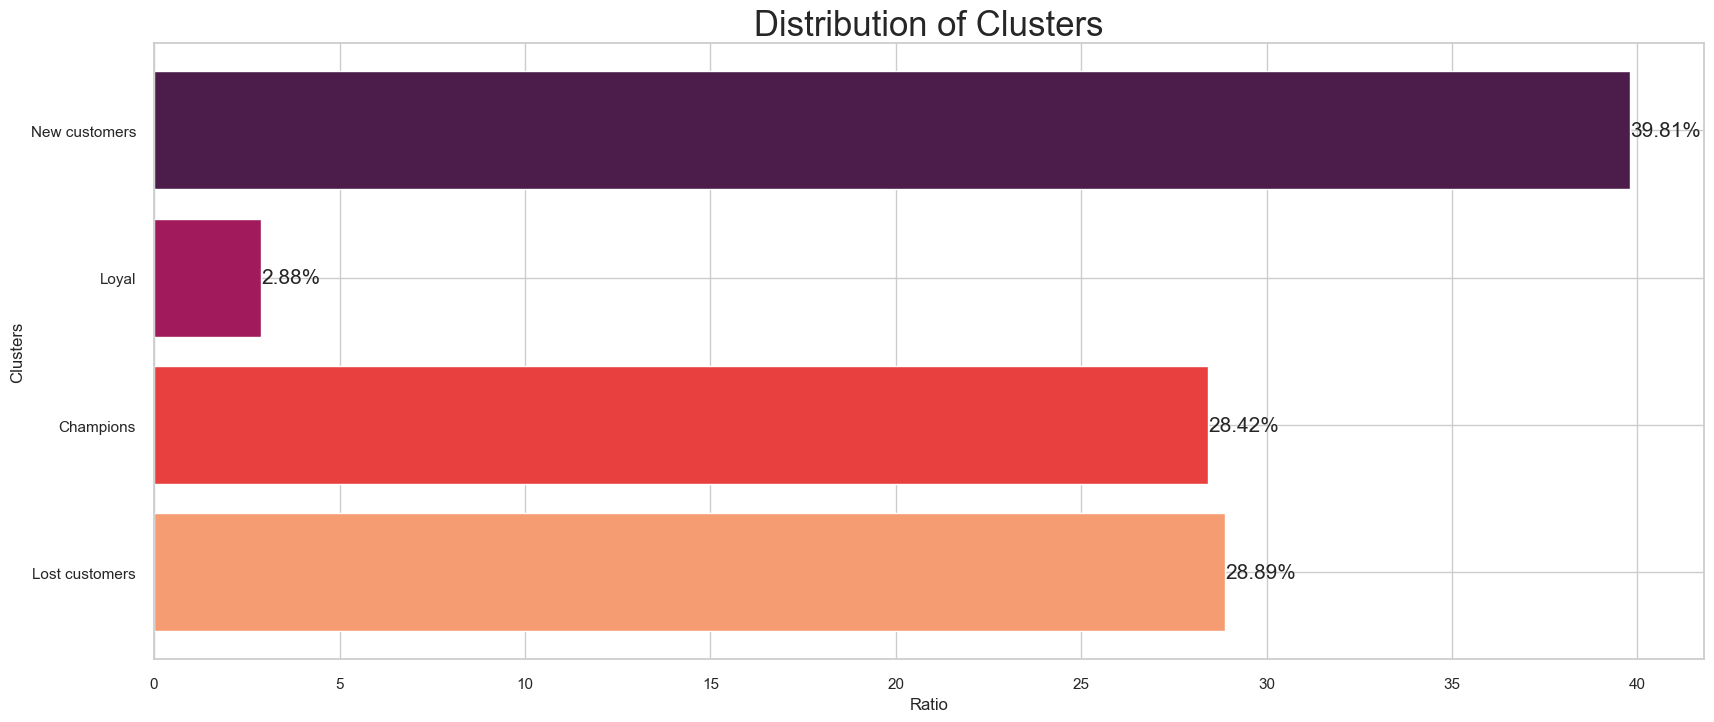

In [60]:
ratios = rfm_stats2['ratio'].values

palette = sns.color_palette("rocket_r", len(ratios))

plt.figure(figsize=(20, 8))
plt.barh(range(len(ratios)), ratios, color=palette)
plt.xlabel('Ratio')
plt.ylabel('Clusters')
plt.yticks(range(len(ratios)), ['Lost customers', 'Champions', 'Loyal', 'New customers'])
plt.title('Distribution of Clusters', fontsize=25)

for i, ratio in enumerate(ratios):
    plt.text(ratio, i, f'{ratio:.2f}%', va='center')
    
plt.show()

Text(0.5, 0.98, 'Customers Segmentation')

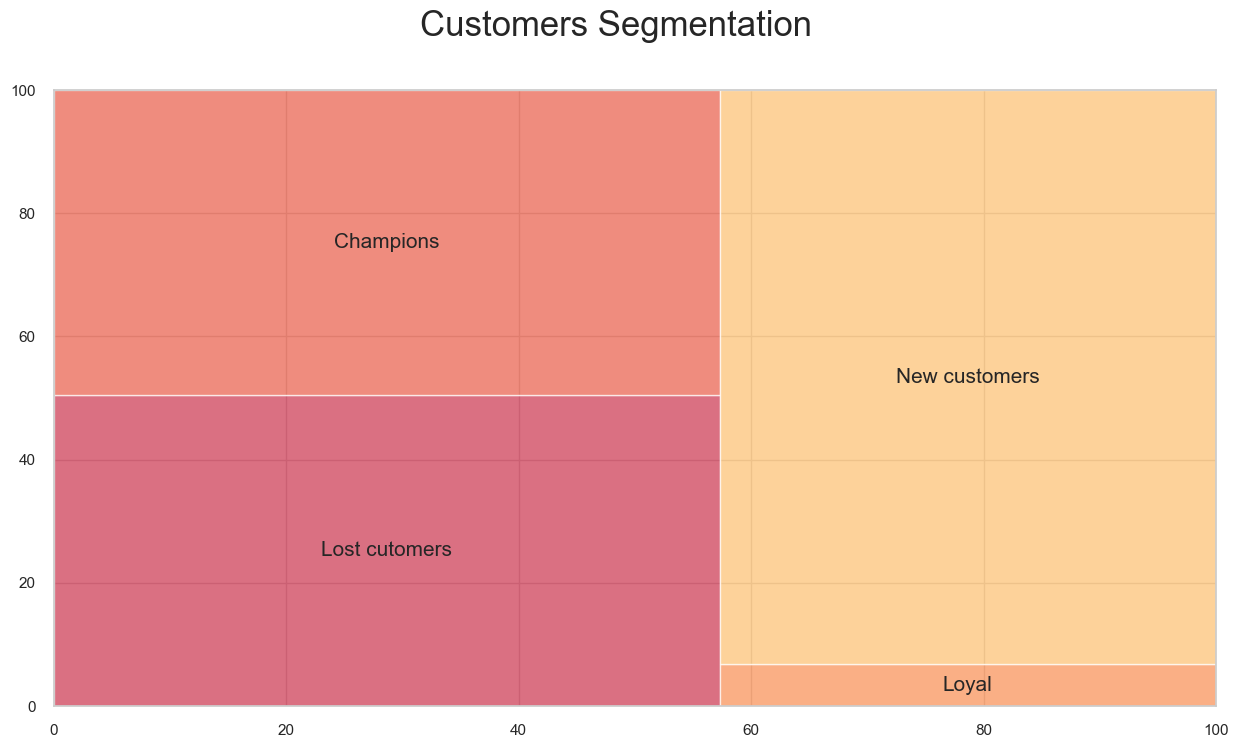

In [61]:
colors = sns.color_palette("Spectral", n_colors=11)

plt.figure(figsize=(15, 8))
squarify.plot(sizes=rfm_stats2["monetary"]["count"], label=rfm_stats2.index, 
              color=colors, alpha=0.7)
plt.suptitle("Customers Segmentation", fontsize=25)

In [62]:
# graphique interactif en 3D
fig = px.scatter_3d(rfm_df2, x='recency', y='frequency', z='monetary', 
                    color='cluster', title='Clusters K-Means in 3D')
fig.show()

---

We have completed the RFM clustering analysis in this notebook. In the next notebook, we will explore more advanced customer clustering techniques by incorporating additional features into our analysis.

See : Notebook 3 Customers clustering